# *ТМО РК1 ИУ5-64 Шимко Даниил*

# Задача №1.
## Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

# Набор данных №3.
## Toy Dataset. A dataset to play around with!

In [66]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi

In [67]:
kaggle_api = KaggleApi()
kaggle_api.authenticate()
kaggle_api.dataset_download_files('carlolepelaars/toy-dataset', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/carlolepelaars/toy-dataset


## Смотрю, что в данных

In [68]:
df = pd.read_csv('toy_dataset.csv')
print(df.shape)
df.head()

(150000, 6)


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


## Сношу лишнее

In [69]:
del df["Number"]
df.head()

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


## Проверяю типы данных, как и ожидалось, категориальные признаки ‒ строки

In [70]:
df.dtypes

City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

## Проверяю значения категориальных признаков

In [71]:
df.City.unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

In [72]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [73]:
df.Illness.unique()

array(['No', 'Yes'], dtype=object)

## Проверяю пропуски, их нет

In [74]:
df.isna().sum()

City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

## Выполняю требование: Если отсутствуют пропуски, замените на пропуски часть значений в одном или нескольких признаках

In [75]:
df.Income[df.Income < 10000] = np.nan
df.isna().sum()

City        0
Gender      0
Age         0
Income     19
Illness     0
dtype: int64

## Обнаружил пропуски в численном признаке "Income", удаляю записи с пропусками

In [76]:
df = df.dropna(axis=0, how="any")
df.isna().sum()

City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

## Преобразую категориальные признаки (one hot encoding)

In [77]:
for to_enc in ["City"]:
    one_hot = pd.get_dummies(df[to_enc]).astype(int)
    del df[to_enc]
    df = df.join(one_hot)
df.Illness = df.Illness.replace({'No': 0, 'Yes': 1})
df.Gender = df.Gender.replace({'Male': 0, 'Female': 1})
df.head()

,Gender,Age,Income,Illness,Austin,Boston,Dallas,Los Angeles,Mountain View,New York City,San Diego,Washington D.C.
0,0,41,40367.0,0,0,0,1,0,0,0,0,0
1,0,54,45084.0,0,0,0,1,0,0,0,0,0
2,0,42,52483.0,0,0,0,1,0,0,0,0,0
3,0,40,40941.0,0,0,0,1,0,0,0,0,0
4,0,46,50289.0,0,0,0,1,0,0,0,0,0


## Провожу корреляционный анализ, с натяжкой можно утверждать о зависимости дохода от проживания в г. Даллас

Dallas           Income           0.715624
Mountain View    Income           0.567808
New York City    Los Angeles      0.371263
                 Dallas           0.276162
                 Mountain View    0.229916
                 Austin           0.212268
Los Angeles      Dallas           0.203141
Income           Gender           0.198565
Washington D.C.  Income           0.194212
New York City    Boston           0.171963
dtype: float64

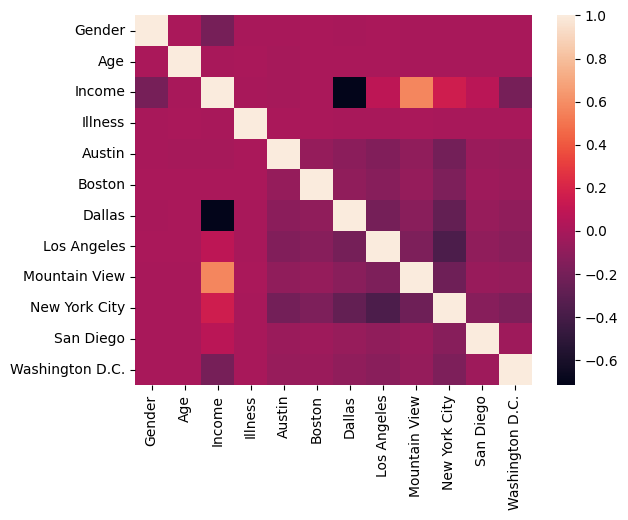

In [78]:
def get_top_abs_correlations(df, n=10, ascending=False, method='pearson'):
    corr = df.corr(method=method)
    sns.heatmap(corr)
    au_corr = corr.abs().unstack()
    labels_to_drop = set()
    for i in au_corr.keys():
        if i[0] == i[1] or not (i[1], i[0]) in labels_to_drop:
            labels_to_drop.add((i[0], i[1]))
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=ascending)
    return au_corr[:n]

get_top_abs_correlations(df)

## Выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель
Имеет смысл исследовать зависимость дохода от места проживания и пола, все прочие, как можно было убедиться выше, совсем слабо выражены.<br>Таким образом можно попытаться построить модель, предсказывающую доход по месту проживания и полу.<br>Однако, мало смысла строить такую модель, так как для неё нет различий между жителями одного города и пола.

## Выполняю дополнительное требование: Для студентов групп ИУ5-63Б, ИУ5Ц-83Б - для произвольной колонки данных построить график "Ящик с усами (boxplot)"

<Axes: ylabel='Income'>

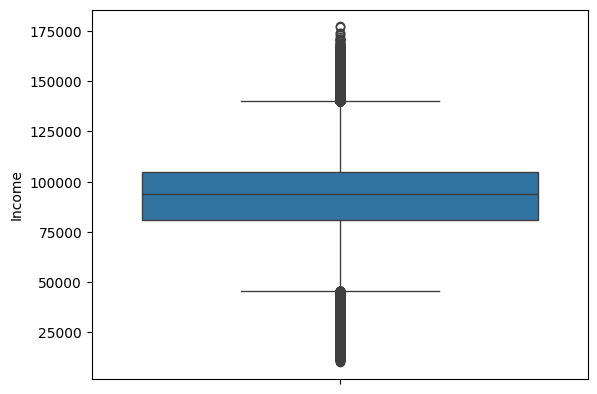

In [79]:
sns.boxplot(y=df["Income"])